In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Загрузка данных
df = pd.read_csv("2023-11-07_Opros_pervokursnikov_3.csv")

# Выбор текстовых колонок (начиная с 4-й)
text_columns = df.columns[3:]

# Объединение текстовых данных в одну колонку
df['Combined_Text'] = df[text_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Использование TF-IDF для векторизации текста
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Combined_Text'])

# Стандартизация данных
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X)

# Применение метода K-средних для кластеризации
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

result_df = df[['Combined_Text', 'Cluster']]

# Сохранение датасета с выбранными колонками
result_df.to_csv("test1.csv", index=False)


C:\Users\naclz\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


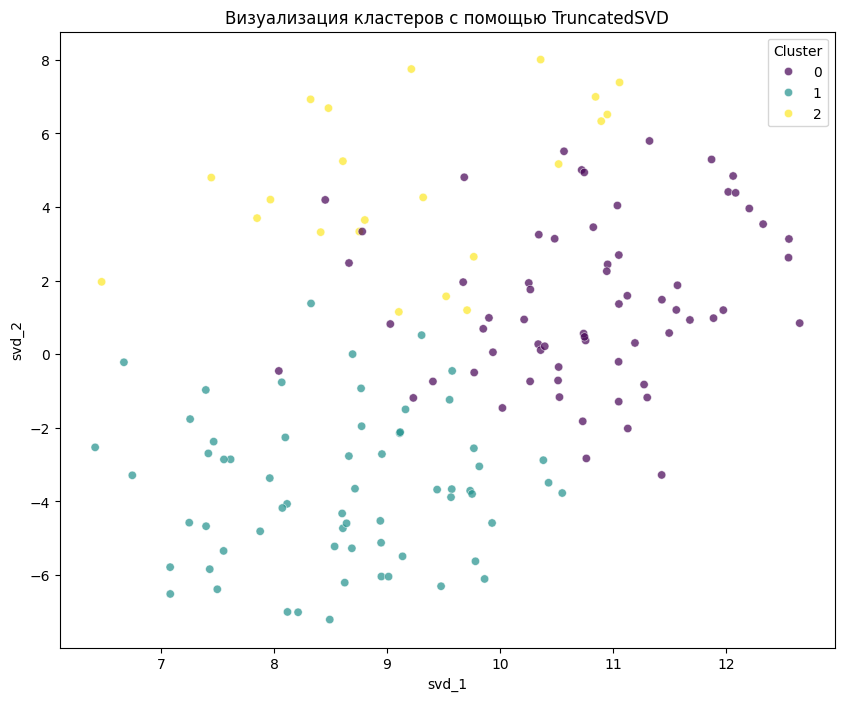

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

# Применение TruncatedSVD для понижения размерности
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Добавление информации о кластерах в DataFrame
df['svd_1'] = X_svd[:, 0]
df['svd_2'] = X_svd[:, 1]

# Визуализация кластеров
plt.figure(figsize=(10, 8))
sns.scatterplot(x='svd_1', y='svd_2', hue='Cluster', data=df, palette='viridis', legend='full', alpha=0.7)
plt.title('Визуализация кластеров с помощью TruncatedSVD')
plt.show()
